In [20]:
import pandas as pd
from pathlib import Path
import matplotlib.pyplot as plt
import numpy as np

#Import % Change of Rent in Miami-Fort Lauderdale-West Palm Beach, FL
molist_price_path = Path("molist.csv")
molist_price_df = pd.read_csv(molist_price_path)

#Rename the columns
molist_price_df = molist_price_df.rename(columns={'MELIPRMSA33100_PCH': 'Percent Change'})
molist_price_df = molist_price_df.rename(columns={'DATE': 'Date'})
molist_price_df.head(2)

,Date,Percent Change
0,9/1/2018,-0.31348
1,10/1/2018,-0.62893


In [21]:
#Import Consumer Price Index for All Urban Consumers:Rent of Primary Residence in Miami-Fort Lauderdale-West Palm Beach, FL
morent_price_path = Path("morent.csv")
morent_price_df = pd.read_csv(morent_price_path)

#Rename the columns
morent_price_df = morent_price_df.rename(columns={'CUURA320SEHA_PCH': 'Percent Change'})
morent_price_df = morent_price_df.rename(columns={'DATE': 'Date'})
morent_price_df.head(2)

,Date,Percent Change
0,9/1/2018,0.29372
1,10/1/2018,0.51097


In [23]:
#Merge the two dataframes 
mergedmo_df = morent_price_df.merge(molist_price_df, on='Date', suffixes=(' Rent', ' Listing Price'))

mergedmo_df.head()

,Date,Percent Change Rent,Percent Change Listing Price
0,9/1/2018,0.29372,-0.31348
1,10/1/2018,0.51097,-0.62893
2,11/1/2018,0.42247,0.00000
3,12/1/2018,0.13885,-1.26582
4,1/1/2019,1.02222,0.00000


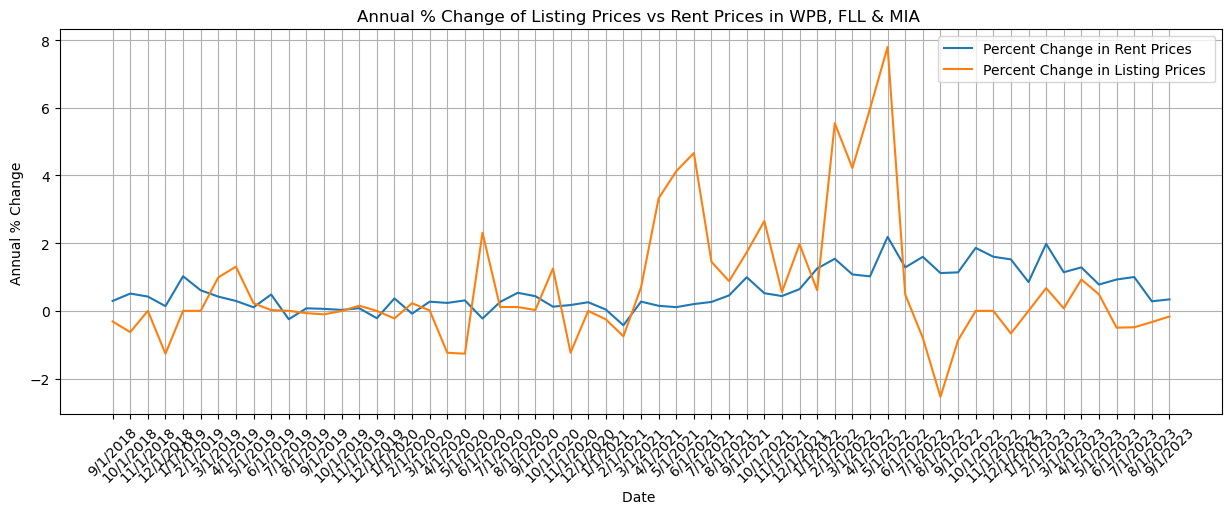

In [24]:
# Extract the x- and y-axes for each DataFrame
mergedmo_x = mergedmo_df["Date"]
mergedmo_y = morent_price_df["Percent Change"]
mergedmo_y1 = molist_price_df["Percent Change"]

# Create the line chart
plt.figure(figsize=(15, 5))
plt.plot(mergedmo_x, mergedmo_y, label=("Percent Change in Rent Prices"))
plt.plot(mergedmo_x, mergedmo_y1, label=("Percent Change in Listing Prices "))


# Add a title, labels, and grid lines
plt.title("Annual % Change of Listing Prices vs Rent Prices in WPB, FLL & MIA ")
plt.ylabel("Annual % Change")
plt.xlabel("Date ")
plt.xticks(rotation=45)
#plt.ylim(280,450)
plt.grid(True)

# Add a legend and show the plot
plt.legend()
plt.show()

In [25]:
# Perform the t-test
from scipy import stats
t_test_results = stats.ttest_ind(morent_price_df['Percent Change'], molist_price_df['Percent Change'], equal_var=True)

# Print the t-test results
print(t_test_results)

Ttest_indResult(statistic=-0.3709011806279056, pvalue=0.7113650969193366)


In [ ]:
In this case, the p-value is 0.7113650969193366, which is greater than the significance level of 0.05. This means that we fail to reject the null hypothesis, which is that there is no difference in the means of the two groups.

Therefore, we can conclude that there is not enough evidence to suggest that there is a statistically significant difference in the means of the two groups.

In [29]:
from scipy import stats

# Extract the independent and dependent variables
X = morent_price_df['Percent Change']
y = molist_price_df['Percent Change']

# Fit the linear regression model
model = stats.linregress(X, y)

# Print the model coefficients
print('Intercept:', model.intercept)
print('Slope:', model.slope)

# Print the R-squared and p-value
print('R-squared:', model.rvalue**2)
print('p-value:', model.pvalue)

# Set the significance level (alpha)
alpha = 0.05



Intercept: 0.25279380585612077
Slope: 0.7313014725199443
R-squared: 0.05282273166956247
p-value: 0.07477431296477006


In [33]:
# Check if the p-value is less than alpha to determine statistical significance
if 'p-value' < 'alpha':
    print("Reject the null hypothesis. There is a significant relationship between % Change in Rental Pricing and List Pricing.")
else:
    print("Fail to reject the null hypothesis. There is no significant relationship between % Change in Rental Pricing and List Pricing.")

Fail to reject the null hypothesis. There is no significant relationship between % Change in Rental Pricing and List Pricing.


<function matplotlib.pyplot.hist(x, bins=None, range=None, density=False, weights=None, cumulative=False, bottom=None, histtype='bar', align='mid', orientation='vertical', rwidth=None, log=False, color=None, label=None, stacked=False, *, data=None, **kwargs)>

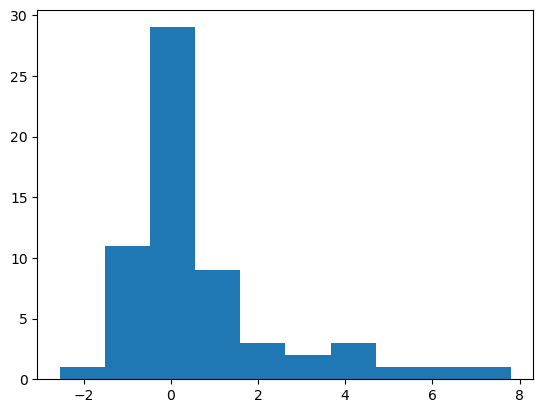

In [4]:
# Visiual Test to see if  % Change of Rent is Normally Distributed
plt.hist(molist_price_df['Percent Change'])
plt.hist


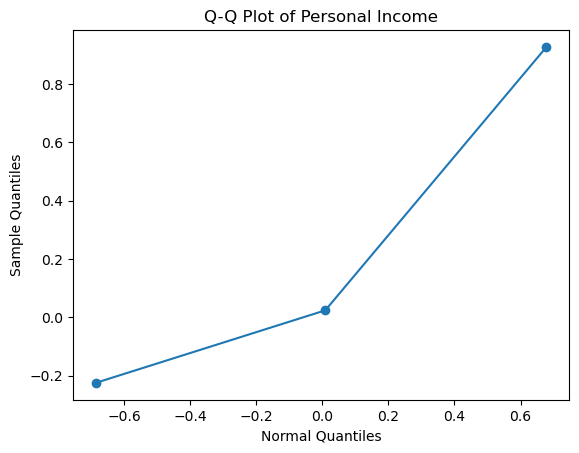

In [6]:
# Calculate the quantiles of the 'Percent Change' column
q = np.quantile(molist_price_df['Percent Change'], [0.25, 0.5, 0.75])

# Calculate the quantiles of the normal distribution
q_norm = np.quantile(np.random.normal(loc=0, scale=1, size=10000), [0.25, 0.5, 0.75])

# Create a Q-Q plot
plt.plot(q_norm, q, 'o-')

# Set the title and axis labels
plt.title('Q-Q Plot of Personal Income')
plt.xlabel('Normal Quantiles')
plt.ylabel('Sample Quantiles')

# Show the plot
plt.show()


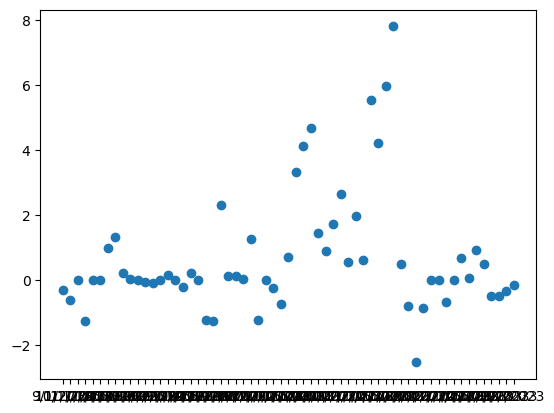

In [9]:
plt.scatter(molist_price_df["Date"], molist_price_df["Percent Change"])
plt.show()